In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import itertools
import torch.nn.functional as F
# import cv2
from PIL import Image
import glob

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
class DataLoaderSegmentation(Dataset):
    def __init__(self, path):
        super(DataLoaderSegmentation, self).__init__()
        img_names = os.listdir
        self.img_files = glob.glob(os.path.join(path,'input_image','*.jpg'))
        self.mask_files = glob.glob(os.path.join(path,'hair_mask','*.png'))  
        
    def __getitem__(self, idx):
        img_path = self.img_files[idx]
        mask_path = self.mask_files[idx]
        
        
        img = mpimg.imread(img_path)/255
        img = torch.from_numpy(img).float()
        
        mask = mpimg.imread(mask_path)
        mask = torch.from_numpy(mask).float()
        
        '''
        img = np.asarray(Image.open(img_path))
        img = torch.from_numpy(img).float()
        
        mask = np.asarray(Image.open(mask_path))
        mask = torch.from_numpy(mask).float()
        '''
        
        return img, mask
    
    def __len__(self):
        return len(self.img_files)

In [3]:
# Visualize some data
# Load data
Dataset = DataLoaderSegmentation("dataset")

['dataset\\input_image\\0.jpg', 'dataset\\input_image\\1.jpg', 'dataset\\input_image\\10.jpg', 'dataset\\input_image\\100.jpg', 'dataset\\input_image\\1000.jpg', 'dataset\\input_image\\1001.jpg', 'dataset\\input_image\\1002.jpg', 'dataset\\input_image\\1003.jpg', 'dataset\\input_image\\1004.jpg', 'dataset\\input_image\\1005.jpg', 'dataset\\input_image\\1006.jpg', 'dataset\\input_image\\1007.jpg', 'dataset\\input_image\\1008.jpg', 'dataset\\input_image\\1009.jpg', 'dataset\\input_image\\101.jpg', 'dataset\\input_image\\1010.jpg', 'dataset\\input_image\\1011.jpg', 'dataset\\input_image\\1012.jpg', 'dataset\\input_image\\1013.jpg', 'dataset\\input_image\\1014.jpg', 'dataset\\input_image\\1015.jpg', 'dataset\\input_image\\1016.jpg', 'dataset\\input_image\\1017.jpg', 'dataset\\input_image\\1018.jpg', 'dataset\\input_image\\1019.jpg', 'dataset\\input_image\\102.jpg', 'dataset\\input_image\\1020.jpg', 'dataset\\input_image\\1021.jpg', 'dataset\\input_image\\1022.jpg', 'dataset\\input_image\\1

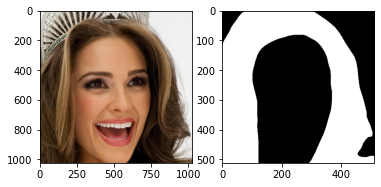

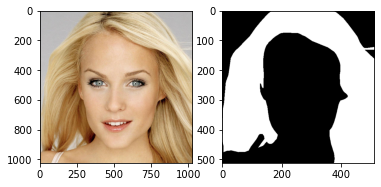

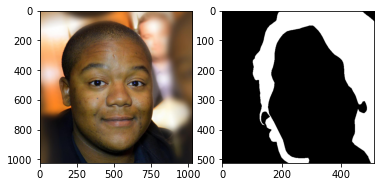

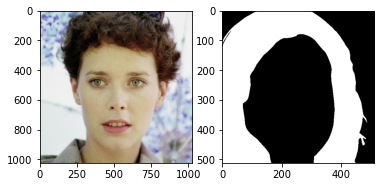

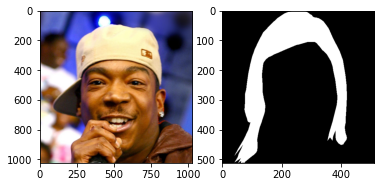

In [4]:
for i in range(5):
    example_img = Dataset[i][0]
    example_mask = Dataset[i][1]
    
    f, (ax1, ax2) = plt.subplots(1,2)
    ax1.imshow(example_img)
    ax2.imshow(example_mask)

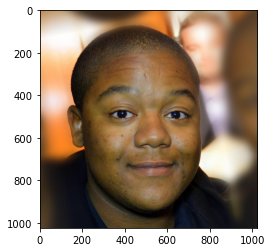

In [7]:
test = Dataset[2][0]
plt.imshow(test)